# Kullback-Leibler Divergence

#### Imports


In [1]:
import torch
from kilroyplot.plot import plt
from torch.functional import F
from scipy.stats import hypergeom

#### Configuration

In [2]:
n = 100

#### Divergences

In [3]:
def calculate_kullback_leibler_divergence(input, target):
    input = input.view(-1, input.size(-1))
    target = target.view(-1, target.size(-1))
    kld = F.kl_div(
        input,
        target,
        reduction="none",
        log_target=True,
    )
    kld = kld.sum(dim=-1).clamp(min=0) / torch.tensor(2.0).log()
    return kld

#### Experiments

In [4]:
def run(ks, M, n):
    klds = []
    xs = range(n + 1)
    target = torch.tensor(hypergeom.pmf(xs, M, n, int(M * 0.5))).log()
    for k in ks:
        input = torch.tensor(hypergeom.pmf(xs, M, n, k)).log()
        kld = calculate_kullback_leibler_divergence(input, target).item()
        klds.append(kld)
    return torch.tensor(klds)

In [5]:
M = n * 10
ks = range(n, M - n + 1)
klds = run(ks, M, n)

Text(0, 0.5, 'Divergence')

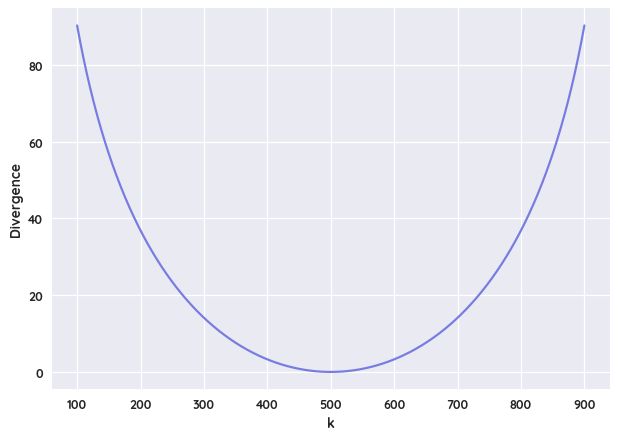

In [6]:
plt.plot(ks, klds)
plt.xlabel("k")
plt.ylabel("Divergence")